# Table of content

## 1. Importing libraries and data set

## 2. Preparing Data

## 3. Dropping categorical variables 

## 4. The elbow technique

## 5. K-means Clustering

## 6. Plotting the K-means clustering

## 7. Descriptive statistics

# 1. Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans 
import pylab as pl 

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [ ]:
# Using path method to import my dataset
"C:\Users\Peter\Desktop\Data Analytics documents\Data Immersion\Achievement 6"

In [3]:
path = r"C:\Users\Peter\Desktop\Data Analytics documents\Data Immersion\Achievement 6"

In [4]:
# imported the dataset
df = pd.read_csv(os.path.join(path, 'Project','Chocolate_Bar_ratings_cleaned.csv'), index_col = False)

In [5]:
df.head()

,Company\n_Maker_if_ known,Specific Bean Origin\nor Bar Name,REF,Review\nDate,Cocoa\ncontent,Company\nLocation,Rating,Bean\nType,Broad Bean\nOrigin
0,A. Morin,Agua Grande,1876,2016,0.63,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,0.70,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,0.70,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,0.70,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,0.70,France,3.50,,Peru


In [6]:
df.shape

(1793, 9)

 ## 2. Preparing Data

In [7]:
# Check for missing values
df.isnull().sum()

Company\n_Maker_if_ known            0
Specific Bean Origin\nor Bar Name    0
REF                                  0
Review\nDate                         0
Cocoa\ncontent                       0
Company\nLocation                    0
Rating                               0
Bean\nType                           0
Broad Bean\nOrigin                   0
dtype: int64

In [8]:
# checking for duplicate
dups = df.duplicated()

In [9]:
dups.shape # No dups

(1793,)

In [10]:
# using the count to find the frequenc of Company\nLocation
df['Company\nLocation'].value_counts(dropna = False)

U.S.A.               763
France               156
Canada               124
U.K.                  96
Italy                 63
Ecuador               54
Australia             49
Belgium               40
Switzerland           38
Germany               35
Austria               26
Spain                 25
Colombia              23
Hungary               22
Venezuela             20
Japan                 17
Brazil                17
Peru                  17
Madagascar            17
New Zealand           17
Denmark               15
Vietnam               11
Scotland              10
Guatemala             10
Israel                 9
Argentina              9
Costa Rica             9
Poland                 8
Netherlands            8
Lithuania              6
Honduras               6
South Korea            5
Nicaragua              5
Sweden                 5
Domincan Republic      5
Mexico                 4
Puerto Rico            4
Fiji                   4
Sao Tome               4
Ireland                4


In [11]:
 # create a flag that assigns a “region” label based on its corresponding region
df.loc[df['Company\nLocation']=='U.S.A.', 'Region'] = 'North America'
df.loc[df['Company\nLocation']=='Canada', 'Region'] = 'North America' 
df.loc[df['Company\nLocation']=='Guatemala', 'Region'] = 'North America' 
df.loc[df['Company\nLocation']=='Costa Rica', 'Region'] = 'North America' 
df.loc[df['Company\nLocation']=='Nicaragua', 'Region'] = 'North America'
df.loc[df['Company\nLocation']=='Mexico', 'Region'] = 'North America'
df.loc[df['Company\nLocation']=='Grenada', 'Region'] = 'North America'
df.loc[df['Company\nLocation']=='St. Lucia', 'Region'] = 'North America'
df.loc[df['Company\nLocation']=='Domincan Republic', 'Region'] = 'North America'
df.loc[df['Company\nLocation']=='Honduras', 'Region'] = 'North America'
df.loc[df['Company\nLocation']=='Puerto Rico', 'Region'] = 'North America'
df.loc[df['Company\nLocation']=='Niacragua', 'Region'] = 'North America'


In [12]:
 # create a flag that assigns a “region” label based on its corresponding region
df.loc[df['Company\nLocation']=='France', 'Region'] = 'Europe'
df.loc[df['Company\nLocation']=='U.K.', 'Region'] = 'Europe' 
df.loc[df['Company\nLocation']=='Italy', 'Region'] = 'Europe' 
df.loc[df['Company\nLocation']=='Belgium', 'Region'] = 'Europe' 
df.loc[df['Company\nLocation']=='Switzerland', 'Region'] = 'Europe'
df.loc[df['Company\nLocation']=='Germany', 'Region'] = 'Europe'
df.loc[df['Company\nLocation']=='Austria', 'Region'] = 'Europe'
df.loc[df['Company\nLocation']=='Spain', 'Region'] = 'Europe'
df.loc[df['Company\nLocation']=='Hungary', 'Region'] = 'Europe'
df.loc[df['Company\nLocation']=='Denmark', 'Region'] = 'Europe' 
df.loc[df['Company\nLocation']=='Scotland', 'Region'] = 'Europe' 
df.loc[df['Company\nLocation']=='Poland', 'Region'] = 'Europe' 
df.loc[df['Company\nLocation']=='Netherlands', 'Region'] = 'Europe'
df.loc[df['Company\nLocation']=='Sweden', 'Region'] = 'Europe'
df.loc[df['Company\nLocation']=='Ireland', 'Region'] = 'Europe'
df.loc[df['Company\nLocation']=='Portugal', 'Region'] = 'Europe'
df.loc[df['Company\nLocation']=='Iceland', 'Region'] = 'Europe'
df.loc[df['Company\nLocation']=='Finland', 'Region'] = 'Europe' 
df.loc[df['Company\nLocation']=='Czech Republic', 'Region'] = 'Europe' 
df.loc[df['Company\nLocation']=='Wales', 'Region'] = 'Europe' 
df.loc[df['Company\nLocation']=='Russia', 'Region'] = 'Europe'
df.loc[df['Company\nLocation']=='Lithuania', 'Region'] = 'Europe'

In [13]:
# create a flag that assigns a “region” label based on its corresponding region
df.loc[df['Company\nLocation']=='Ecuador', 'Region'] = 'South America'
df.loc[df['Company\nLocation']=='Colombia', 'Region'] = 'South America' 
df.loc[df['Company\nLocation']=='Venezuela', 'Region'] = 'South America' 
df.loc[df['Company\nLocation']=='Brazil', 'Region'] = 'South America' 
df.loc[df['Company\nLocation']=='Peru', 'Region'] = 'South America'
df.loc[df['Company\nLocation']=='Argentina', 'Region'] = 'South America'
df.loc[df['Company\nLocation']=='Chile', 'Region'] = 'South America'
df.loc[df['Company\nLocation']=='Bolivia', 'Region'] = 'South America'
df.loc[df['Company\nLocation']=='Suriname', 'Region'] = 'South America'

In [14]:
# create a flag that assigns a “region” label based on its corresponding region
df.loc[df['Company\nLocation']=='Japan', 'Region'] = 'Asia'
df.loc[df['Company\nLocation']=='Vietnam', 'Region'] = 'Asia' 
df.loc[df['Company\nLocation']=='Israel', 'Region'] = 'Asia' 
df.loc[df['Company\nLocation']=='South Korea', 'Region'] = 'Asia' 
df.loc[df['Company\nLocation']=='Singapore', 'Region'] = 'Asia'
df.loc[df['Company\nLocation']=='India', 'Region'] = 'Asia'
df.loc[df['Company\nLocation']=='Philippines', 'Region'] = 'Asia'

In [15]:
# create a flag that assigns a “region” label based on its corresponding region
df.loc[df['Company\nLocation']=='Madagascar', 'Region'] = 'Africa'
df.loc[df['Company\nLocation']=='Sao Tome', 'Region'] = 'Africa' 
df.loc[df['Company\nLocation']=='South Africa', 'Region'] = 'Africa' 
df.loc[df['Company\nLocation']=='Ghana', 'Region'] = 'Africa' 

In [16]:
# create a flag that assigns a “region” label based on its corresponding region
df.loc[df['Company\nLocation']=='New Zealand', 'Region'] = 'Others'
df.loc[df['Company\nLocation']=='Fiji', 'Region'] = 'Others' 
df.loc[df['Company\nLocation']=='Martinique', 'Region'] = 'Others' 
df.loc[df['Company\nLocation']=='Eucador', 'Region'] = 'Others'
df.loc[df['Company\nLocation']=='Australia', 'Region'] = 'Others' 

In [17]:
# using the count to count the new created region
df['Region'].value_counts(dropna = False)

North America    936
Europe           568
South America    145
Others            72
Asia              47
Africa            25
Name: Region, dtype: int64

In [18]:
df.head()

,Company\n_Maker_if_ known,Specific Bean Origin\nor Bar Name,REF,Review\nDate,Cocoa\ncontent,Company\nLocation,Rating,Bean\nType,Broad Bean\nOrigin,Region
0,A. Morin,Agua Grande,1876,2016,0.63,France,3.75,,Sao Tome,Europe
1,A. Morin,Kpime,1676,2015,0.70,France,2.75,,Togo,Europe
2,A. Morin,Atsane,1676,2015,0.70,France,3.00,,Togo,Europe
3,A. Morin,Akata,1680,2015,0.70,France,3.50,,Togo,Europe
4,A. Morin,Quilla,1704,2015,0.70,France,3.50,,Peru,Europe


### Transforming categorical variables to numerical using one_hot_encoding

In [19]:
# using get dumies for the new created region
print(pd.get_dummies(df['Region']))

      Africa  Asia  Europe  North America  Others  South America
0          0     0       1              0       0              0
1          0     0       1              0       0              0
2          0     0       1              0       0              0
3          0     0       1              0       0              0
4          0     0       1              0       0              0
...      ...   ...     ...            ...     ...            ...
1788       0     0       1              0       0              0
1789       0     0       1              0       0              0
1790       0     0       1              0       0              0
1791       0     0       1              0       0              0
1792       0     0       1              0       0              0

[1793 rows x 6 columns]


In [20]:
Region_dummies = pd.get_dummies(df['Region'])

In [21]:
Region_dummies.head()

,Africa,Asia,Europe,North America,Others,South America
0,0,0,1,0,0,0
1,0,0,1,0,0,0
2,0,0,1,0,0,0
3,0,0,1,0,0,0
4,0,0,1,0,0,0


In [22]:
# using get dumies for the Bean\nType
print(pd.get_dummies(df['Bean\nType']))

      Amazon  Amazon mix  Amazon, ICS  Beniano  Blend  \
0          0           0            0        0      0   
1          0           0            0        0      0   
2          0           0            0        0      0   
3          0           0            0        0      0   
4          0           0            0        0      0   
...      ...         ...          ...      ...    ...   
1788       0           0            0        0      0   
1789       0           0            0        0      0   
1790       0           0            0        0      0   
1791       0           0            0        0      0   
1792       0           0            0        0      0   

      Blend-Forastero,Criollo  CCN51  Criollo  Criollo (Amarru)  \
0                           0      0        0                 0   
1                           0      0        0                 0   
2                           0      0        0                 0   
3                           0      0        0  

In [23]:
Bean_Type_dummies = pd.get_dummies(df['Bean\nType'])

In [24]:
Bean_Type_dummies.head()

,Amazon,Amazon mix,"Amazon, ICS",Beniano,Blend,"Blend-Forastero,Criollo",CCN51,Criollo,Criollo (Amarru),Criollo (Ocumare 61),...,Nacional (Arriba),Trinitario,Trinitario (85% Criollo),Trinitario (Amelonado),Trinitario (Scavina),"Trinitario, Criollo","Trinitario, Forastero","Trinitario, Nacional","Trinitario, TCGA",
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [25]:
# Attaching both created dummies to the DataFrame 
df_new = pd.concat([df,Region_dummies,Bean_Type_dummies], axis=1)

In [26]:
df_new

,Company\n_Maker_if_ known,Specific Bean Origin\nor Bar Name,REF,Review\nDate,Cocoa\ncontent,Company\nLocation,Rating,Bean\nType,Broad Bean\nOrigin,Region,...,Nacional (Arriba),Trinitario,Trinitario (85% Criollo),Trinitario (Amelonado),Trinitario (Scavina),"Trinitario, Criollo","Trinitario, Forastero","Trinitario, Nacional","Trinitario, TCGA",
0,A. Morin,Agua Grande,1876,2016,0.63,France,3.75,,Sao Tome,Europe,...,0,0,0,0,0,0,0,0,0,1
1,A. Morin,Kpime,1676,2015,0.70,France,2.75,,Togo,Europe,...,0,0,0,0,0,0,0,0,0,1
2,A. Morin,Atsane,1676,2015,0.70,France,3.00,,Togo,Europe,...,0,0,0,0,0,0,0,0,0,1
3,A. Morin,Akata,1680,2015,0.70,France,3.50,,Togo,Europe,...,0,0,0,0,0,0,0,0,0,1
4,A. Morin,Quilla,1704,2015,0.70,France,3.50,,Peru,Europe,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1788,Zotter,Peru,647,2011,0.70,Austria,3.75,,Peru,Europe,...,0,0,0,0,0,0,0,0,0,1
1789,Zotter,Congo,749,2011,0.65,Austria,3.00,Forastero,Congo,Europe,...,0,0,0,0,0,0,0,0,0,0
1790,Zotter,Kerala State,749,2011,0.65,Austria,3.50,Forastero,India,Europe,...,0,0,0,0,0,0,0,0,0,0
1791,Zotter,Kerala State,781,2011,0.62,Austria,3.25,,India,Europe,...,0,0,0,0,0,0,0,0,0,1


In [27]:
# Check for missing values
df_new.isnull().sum()

Company\n_Maker_if_ known            0
Specific Bean Origin\nor Bar Name    0
REF                                  0
Review\nDate                         0
Cocoa\ncontent                       0
Company\nLocation                    0
Rating                               0
Bean\nType                           0
Broad Bean\nOrigin                   0
Region                               0
Africa                               0
Asia                                 0
Europe                               0
North America                        0
Others                               0
South America                        0
Amazon                               0
Amazon mix                           0
Amazon, ICS                          0
Beniano                              0
Blend                                0
Blend-Forastero,Criollo              0
CCN51                                0
Criollo                              0
Criollo (Amarru)                     0
Criollo (Ocumare 61)     

# 3. Dropping categorical variables

In [28]:
# dropping of categorical data, since we need to keep only the numerical variable
df1 = df_new.drop(columns =['Company\n_Maker_if_ known','Specific Bean Origin\nor Bar Name','Company\nLocation','Bean\nType','Broad Bean\nOrigin','Region','REF','Review\nDate'])

In [29]:
df1

,Cocoa\ncontent,Rating,Africa,Asia,Europe,North America,Others,South America,Amazon,Amazon mix,...,Nacional (Arriba),Trinitario,Trinitario (85% Criollo),Trinitario (Amelonado),Trinitario (Scavina),"Trinitario, Criollo","Trinitario, Forastero","Trinitario, Nacional","Trinitario, TCGA",
0,0.63,3.75,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0.70,2.75,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0.70,3.00,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0.70,3.50,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0.70,3.50,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1788,0.70,3.75,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1789,0.65,3.00,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1790,0.65,3.50,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1791,0.62,3.25,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


# 4. The elbow technique

In [30]:
# defining the range of potential clusters in the data
num_cl = range(1, 10) 
# defining the k-means clusters in the range assigned above
kmeans = [KMeans(n_clusters=i) for i in num_cl]

In [31]:
# creating a score for each of the ranges created
score = [kmeans[i].fit(df1).score(df1) for i in range(len(kmeans))] 

score

[-2759.504162297824,
 -2081.627088724209,
 -1726.539503240544,
 -1527.6427827616794,
 -1351.845584259664,
 -1211.9212776866261,
 -1101.3677545551807,
 -1040.0877255750847,
 -975.8799350094891]

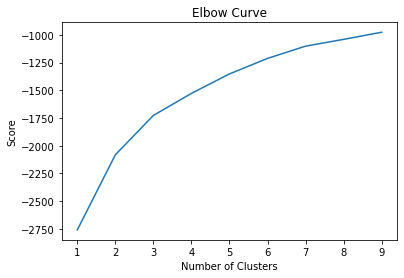

In [32]:
# Ploting the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

As shown in the above figure, there is a big jump from 1 to 2 and 2 to 3, and also 3 to 5, however, after 5 the curve begining to go on a smooth leave. Hence, choose 5 clusters in this case will be very important. Thus, i choose 5.  

# 5. K-means Clustering

In [33]:
# creating the object based on the n° of clusters
kmeans = KMeans(n_clusters = 5) 

In [34]:
# fitting the K-mean into the Dataframe
kmeans.fit(df1)

KMeans(n_clusters=5)

In [35]:
# attaching it to the Dataframe
df1['clusters'] = kmeans.fit_predict(df1)

In [36]:
df1.head()

,Cocoa\ncontent,Rating,Africa,Asia,Europe,North America,Others,South America,Amazon,Amazon mix,...,Trinitario,Trinitario (85% Criollo),Trinitario (Amelonado),Trinitario (Scavina),"Trinitario, Criollo","Trinitario, Forastero","Trinitario, Nacional","Trinitario, TCGA",,clusters
0,0.63,3.75,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,2
1,0.70,2.75,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,2
2,0.70,3.00,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,2
3,0.70,3.50,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,2
4,0.70,3.50,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,2


In [37]:
# using count to Verify if the clusters we correctly assigned 
df1['clusters'].value_counts()

0    540
4    460
1    350
3    225
2    218
Name: clusters, dtype: int64

# 6. Plotting the K-means clustering

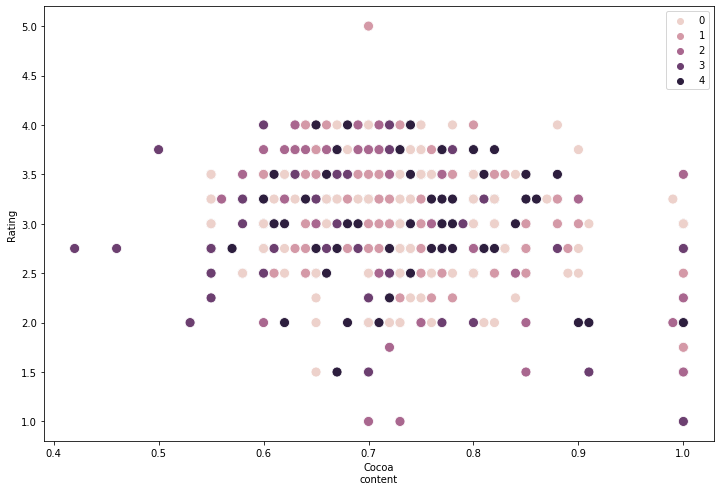

In [38]:
# Plotting the Cocoa\ncontent and Rating variables

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df1['Cocoa\ncontent'], y=df1['Rating'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Cocoa\ncontent') # Label x-axis.
plt.ylabel('Rating') # Label y-axis.
plt.show()

In [41]:
ax.saveplt("Cluster.png")

AttributeError: 'AxesSubplot' object has no attribute 'saveplt'

Looking at the plot, we could see that the cluster 2 has the highest rating at 5.0.And is widely distributed. Clusters 3 and 4,have the lowest rating at 1.0.And they are sparsely distributed. While the clusters 0 and 1 have average rating and thus widely distributed. 

# 7. Descriptive statistics

In [88]:
df1.groupby('clusters').agg({'Rating':['mean', 'median'], 
                         'Cocoa\ncontent':['mean', 'median'], 
                         })

Rating        Cocoa\ncontent       
              mean median           mean median
clusters                                       
0         3.132407   3.25       0.716204   0.70
1         3.226641   3.25       0.715985   0.70
2         3.281963   3.25       0.721438   0.71
3         3.126866   3.25       0.707015   0.70
4         3.105505   3.25       0.721193   0.70

From the statictical point of view, the cluster 2,shows a better judgement as compare to others. The mean of the cocoa content and the rating is higher as compare to others. 